Problem Statement: A fintech company specializes on loans and has partnered with P2P lending marketplace. The number of conversions from leads through marketplace are satisfactory but the company wants to increase these conversions for better profits. 

Market: The loan applicants who reached out through an intermediary marketplace.

Product: Loan

Goal: Determining the 'quality' applicants who reach a key part of loan application process i.e electronic signature phase(e_sign) and target those applicants who are predicted to not reach the e_sign phase with different onboarding screens.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [2]:
dataset = pd.read_csv("P39-Financial-Data.csv")

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
dataset.isnull().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

HISTOGRAMS

In [7]:
dataset2 = dataset.drop(["entry_id","pay_schedule","e_signed"], axis=1)

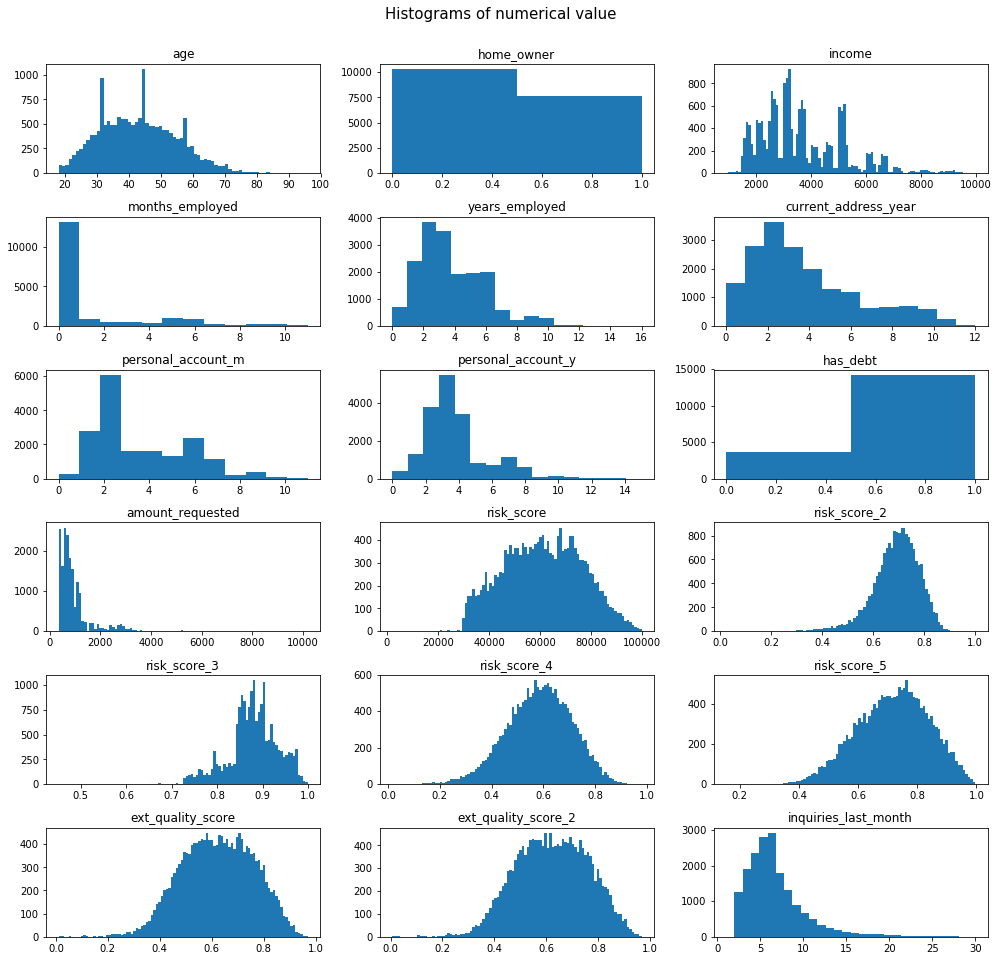

In [8]:
fig = plt.figure(figsize=(14,14))
plt.suptitle("Histograms of numerical value", fontsize=15)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f= plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals>100:
        vals=100
    plt.hist(dataset2.iloc[:,i], bins=vals)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

We observe that the month_employed column seems to be inaccurate since its value is '0' for most of the observations, so we will remove it during feature engineering.

CORRELATION WITH RESPONSE

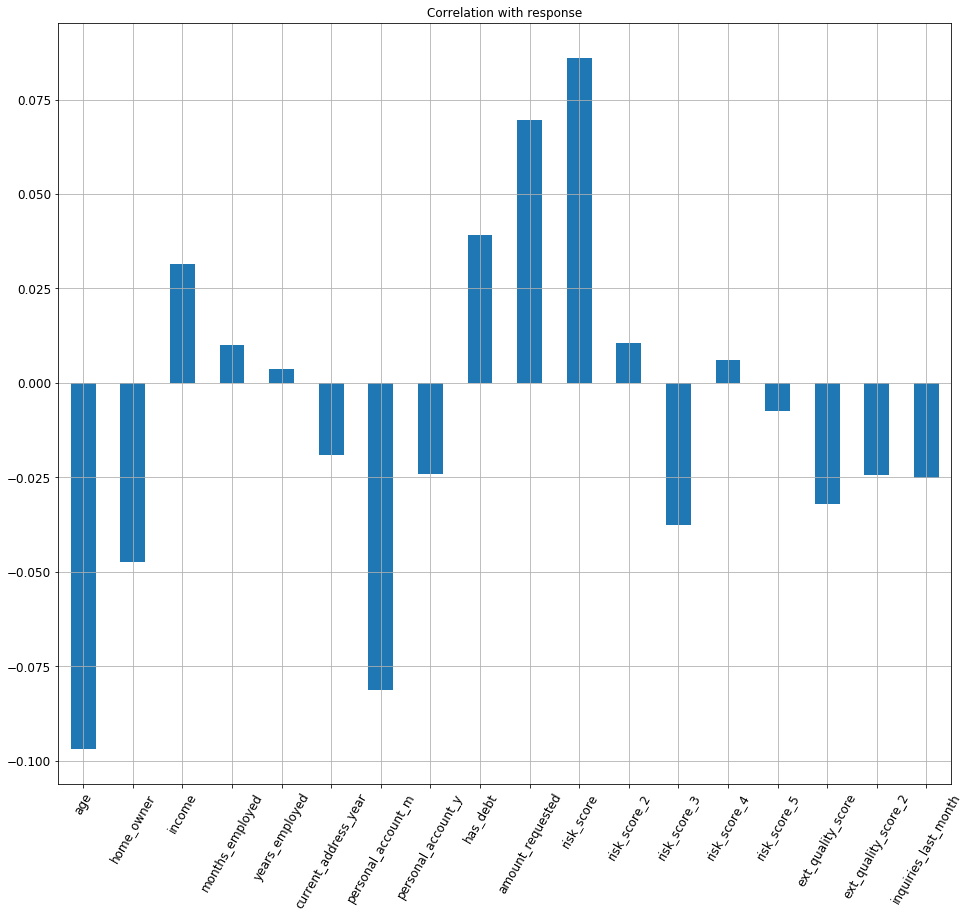

In [9]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(16,14), fontsize=12, rot=60, grid=True, title="Correlation with response")
plt.show()

The +ve and -ve sign of correlation seem obvious for most of the features.

CORRELATION WITH ONE ANOTHER

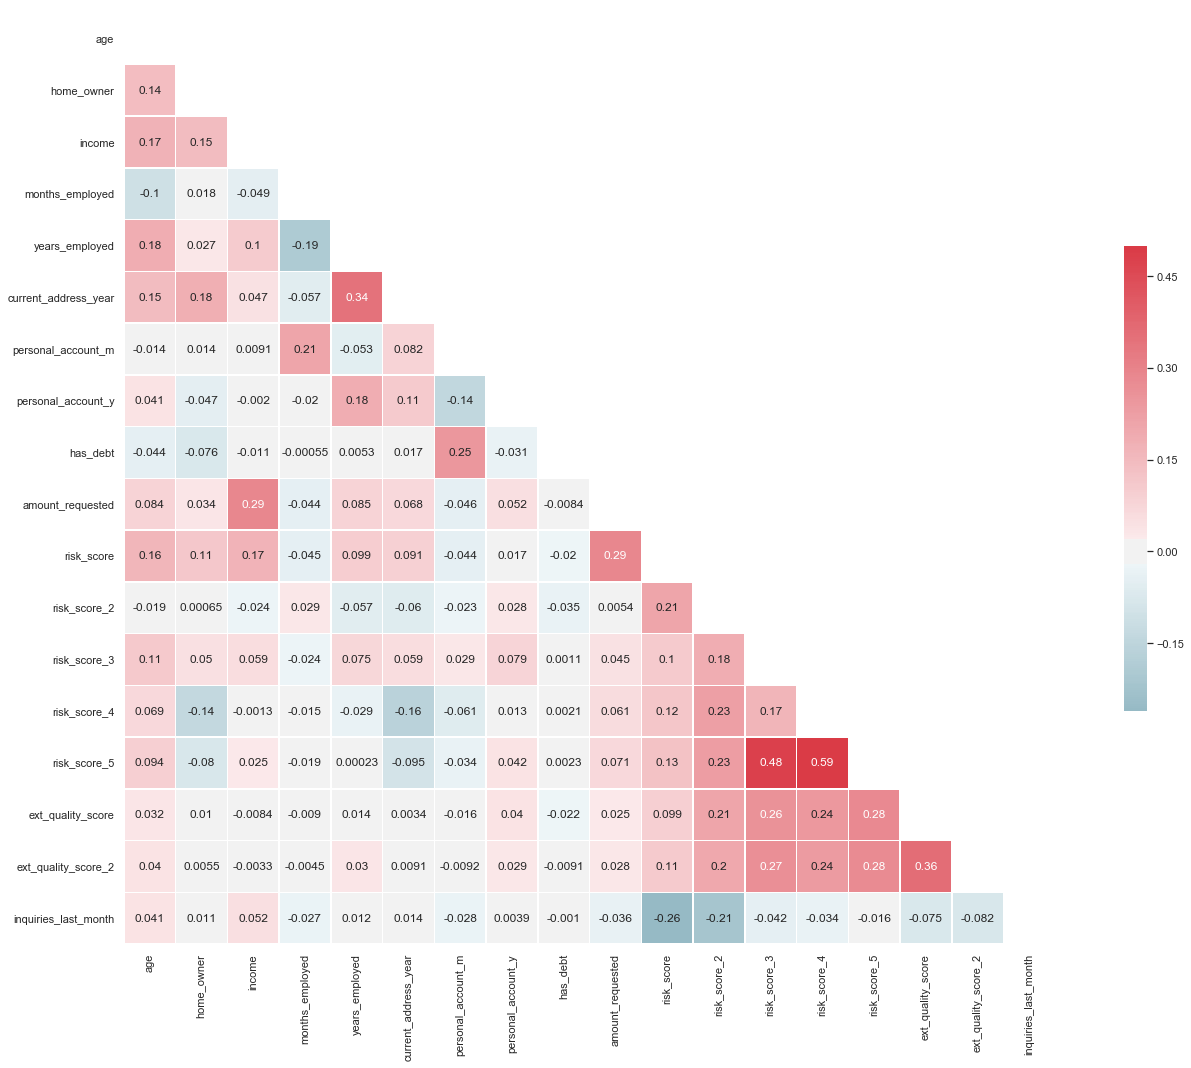

In [10]:
sns.set(style='white')
corr = dataset2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax= plt.subplots(figsize=(20,15))
cmap= sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, cbar_kws={"shrink":.5}, linewidths=0.5,fmt='.2g',annot=True)
plt.tight_layout()
plt.show()

We do not find strong correlation among any of the features.

FEATURE ENGINEERING

In [11]:
dataset = dataset.drop(["months_employed"], axis=1)   #"months_employed" seems inaccurate due to distribution observed in histogram

In [12]:
dataset["personal_account_months"]= (dataset.personal_account_m + dataset.personal_account_y*12)

In [13]:
dataset = dataset.drop(["personal_account_m", "personal_account_y"], axis=1)

In [14]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


ONE HOT ENCODING

In [15]:
dataset = pd.get_dummies(dataset)

In [16]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [17]:
dataset = dataset.drop(["pay_schedule_semi-monthly"], axis=1)

In [18]:
X = dataset.drop(["entry_id","e_signed"], axis=1)
y= dataset["e_signed"]
users = dataset["entry_id"]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

FEATURE SCALING 

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_s = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_s = pd.DataFrame(sc_X.transform(X_test))
X_train_s.columns = X_train.columns.values
X_test_s.columns = X_test.columns.values
X_train_s.index = X_train.index.values
X_test_s.index = X_test.index.values
X_train= X_train_s
X_test= X_test_s

FITTING CLASSIFICATION MODEL 1

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier=LogisticRegression(random_state=0, penalty="l1")

In [23]:
classifier.fit(X_train,y_train)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [27]:
results = pd.DataFrame([["Logistic Regression(Lasso)",acc, pre, rec, f1]],
             columns= ["Model","Accuracy","Precision","Recall","F1_score"])
results

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression(Lasso),0.561977,0.575963,0.705913,0.634351


FITTING CLASSIFICATION MODEL 2

In [28]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [29]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
model_results = pd.DataFrame([["SVM(Linear)",acc, pre, rec, f1]],
             columns= ["Model","Accuracy","Precision","Recall","F1_score"])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354


FITTING CLASSIFICATION MODEL 3

In [30]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [31]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
model_results = pd.DataFrame([["SVM(rbf)",acc, pre, rec, f1]],
             columns= ["Model","Accuracy","Precision","Recall","F1_score"])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354
2,SVM(rbf),0.591569,0.605730,0.690871,0.645505


FITTING CLASSIFICATION MODEL 4

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [33]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
model_results = pd.DataFrame([["Random Forest",acc, pre, rec, f1]],
             columns= ["Model","Accuracy","Precision","Recall","F1_score"])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354
2,SVM(rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621720,0.640098,0.678942,0.658948


PERFORMING K FOLD CROSS VALIDATION ON RANDOM FOREST MODEL

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [35]:
print("Random Forest Classifier Accuracy: %0.2f(+/- %0.2f)" %(accuracies.mean(),accuracies.std()*2))

Random Forest Classifier Accuracy: 0.63(+/- 0.03)


PERFORMING GRID SERACH ON RANDOM FOREST CLASSIFIER

In [36]:
parameters = {"n_estimators":[50,100,200],
             "criterion":["entropy","gini"]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)

In [84]:
rf_best_parameters = grid_search.best_params_
rf_best_accuracy = grid_search.best_score_

In [85]:
rf_best_accuracy, rf_best_parameters

(0.6340220577970124, {'criterion': 'gini', 'n_estimators': 200})

In [86]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
model_results = pd.DataFrame([["Random Forest(Grid Search)",acc, pre, rec, f1]],
             columns= ["Model","Accuracy","Precision","Recall","F1_score"])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354
2,SVM(rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621999,0.640137,0.679979,0.659457
4,Random Forest(Grid Search),0.624791,0.640250,0.691390,0.664838


FINAL RESULTS

In [88]:
final_results = pd.concat([y_test, users], axis=1).dropna()
final_results["predicted e_signed"] = y_pred
final_reults = final_results[["entry_id","e_signed","predicted e_signed"]]

In [89]:
final_results

,e_signed,entry_id,predicted e_signed
8,1.0,6493191,0
9,1.0,8908605,0
12,1.0,6889184,1
16,0.0,9375601,1
18,1.0,8515555,1
31,0.0,2881357,0
33,1.0,7048193,1
37,1.0,5815308,1
44,1.0,8700190,1
45,0.0,8232654,0


Conclusion: We applied 4 different algorithms and found that Random Forest gives the best results. We then applied Grid search to random forest classifier to get the best parameters and ended up with an f1_score of 66%. Thus we can target the right customers with different onboarding screens which may increase the chances of customer e-signing the loan and thereby increasing the profits of company.